In [1]:
import pickle
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from IPython.display import Image
from config import test_images_dir
import matplotlib.image as mpimg
from keras.layers import Dense, Embedding, LSTM, Add, Input, Dropout, Bidirectional
%run text_data.ipynb

Using TensorFlow backend.


Number of unique words in the vocabulary : 1792
Maximum length of caption is :  39


In [13]:
from config import test_images_dir
import matplotlib.image as mpimg

ImportError: cannot import name 'test_images_dir' from 'config' (C:\Anaconda\envs\deeplearning\Projects\ImageCaptioning\config.py)

In [2]:
with open('embeddings', 'rb') as fp :
    embeddings = pickle.load(fp)

In [3]:
model_i = Input(shape = (2048,))
model_dr1 = Dropout(0.5)(model_i)
model_d = Dense(512)(model_dr1)

In [4]:
model_t = Input(shape = (39,))
model_e = Embedding(1792, 200)(model_t)
model_dr2 = Dropout(0.5)(model_e)
model_l = Bidirectional(LSTM(256))(model_dr2)

In [5]:
model_c = Add()([model_d, model_l])
model_cd1 = Dense(512)(model_c)
model_cd2 = Dense(1792, activation = 'softmax')(model_cd1)

In [6]:
model = Model(inputs = [model_i, model_t], output = model_cd2)

C:\Anaconda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [7]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 39)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 39, 200)      358400      input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_1[0][0]                    
____________________________________________________________________________________________

In [8]:
model.layers[2].set_weights([embeddings])
model.layers[2].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [2]:
generator =  data_generator(text_dict, word_index, 10, transferred_features, maxlen, num_classes)

In [3]:
model = load_model('model_1.h5')

In [9]:
model.fit_generator(generator, epochs = 1, verbose = 1, steps_per_epoch = 700)
model.save('model_1.h5')

Epoch 1/1
700/700 [==============================] - 354s 506ms/step - loss: 3.9960


In [14]:
model.fit_generator(generator, epochs = 1, verbose = 1, steps_per_epoch = 700)
model.save('model_1.h5')

Epoch 1/1
700/700 [==============================] - 353s 505ms/step - loss: 3.3595


In [18]:
model.fit_generator(generator, epochs = 1, verbose = 1, steps_per_epoch = 700)
model.save('model_1.h5')

Epoch 1/1
700/700 [==============================] - 356s 509ms/step - loss: 3.1868


In [4]:
model.fit_generator(generator, epochs = 1, verbose = 1, steps_per_epoch = 700)
model.save('model_1.h5')

Epoch 1/1
700/700 [==============================] - 353s 505ms/step - loss: 3.1018


In [6]:
model.fit_generator(generator, epochs = 1, verbose = 1, steps_per_epoch = 700)
model.save('model_1.h5')

Epoch 1/1
700/700 [==============================] - 369s 527ms/step - loss: 3.0332


In [4]:
with open('test_images', 'rb') as fp :
    test_images = pickle.load(fp)

In [5]:
def greedy_search(image):
    seed = 'start'
    image = np.reshape(image, (1,2048))
    for i in range(maxlen):
        sequences = [word_index[w] for w in seed.split() if w in word_index]
        sequences = sequence.pad_sequences([sequences], maxlen = maxlen)
        probs = model.predict([image, sequences], verbose = 0)
        probs_max = np.argmax(probs)
        word = index_word[probs_max]
        seed += ' ' + word
        if (word == 'end'):
            break
    caption = seed.split()
    caption = caption[1:-1]
    caption = ' '.join(caption)
    return caption

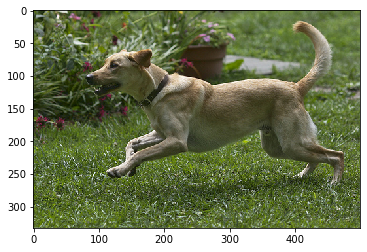

'a dog is running through a field of a dog'

In [8]:
image = mpimg.imread(os.path.join(test_images_dir,'2654514044_a70a6e2c21.jpg'))
plt.imshow(image)
plt.show()
greedy_search(test_images['2654514044_a70a6e2c21'])

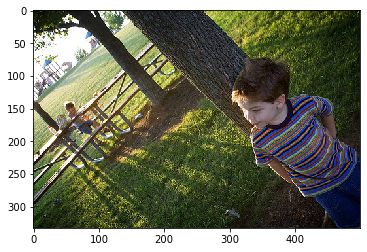

'a boy in a striped shirt is jumping into a fence'

In [16]:
image = mpimg.imread(os.path.join(test_images_dir,'2646116932_232573f030.jpg'))
plt.imshow(image)
plt.show()
greedy_search(test_images['2646116932_232573f030'])

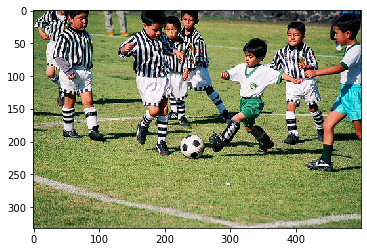

'a young boy is playing with a ball in the field'

In [17]:
image = mpimg.imread(os.path.join(test_images_dir,'2370481277_a3085614c9.jpg'))
plt.imshow(image)
plt.show()
greedy_search(test_images['2370481277_a3085614c9'])

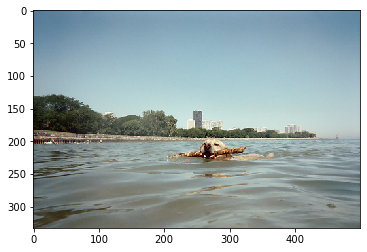

'a dog swims through the water'

In [19]:
image = mpimg.imread(os.path.join(test_images_dir,'2870875612_2cbb9e4a3c.jpg'))
plt.imshow(image)
plt.show()
greedy_search(test_images['2870875612_2cbb9e4a3c'])